In [3]:
import os
import numpy as np
import shutil

In [4]:
path_1 = "multi_spectrum"
path_2 = "SAR"

In [7]:
for path in list([path_1, path_2]):
    print(f"Number of files in {path}: {len(os.listdir(path))}")

Number of files in multi_spectrum: 74980
Number of files in SAR: 74980


In [5]:
folder_1 = "S2_data"
folder_2 = "S1_data"

In [ ]:
# if not os.path.exists(folder_1):
#     os.mkdir(folder_1)
#     for file in os.listdir(path_1):
#         if file.endswith(".tif"):
#             print(f"Copying {file:} to {folder_1} folder", end = '\r')
#             shutil.copy(os.path.join(path_1,file), os.path.join(folder_1,file))
    

In [24]:
# if not os.path.exists(folder_2):
#     os.mkdir(folder_2)
#     for file in os.listdir(path_2):
#         if file.endswith(".tif"):
#             print(f"Copying {file:} to {folder_2} folder", end = '\r')
#             shutil.copy(os.path.join(path_2,file), os.path.join(folder_2,file))

In [6]:
# Get the number of files in the each of the path
print(f"Number of files in {folder_1} is {len(os.listdir(folder_1))}")
print(f"Number of files in {folder_2} is {len(os.listdir(folder_2))}")

Number of files in S2_data is 74880
Number of files in S1_data is 74880


In [8]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Read the image
for file in os.listdir(folder_1):
    image = gdal.Open(os.path.join(folder_1, file))
    print(f"Image size: {image.RasterXSize} x {image.RasterYSize}")
    print(f"Number of bands: {image.RasterCount}")
    print(f"Projection: {image.GetProjection()}")
    print(f"Geotransform: {image.GetGeoTransform()}")
    print(f"Driver: {image.GetDriver().LongName}")
    break

Image size: 10 x 10
Number of bands: 3
Projection: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
Geotransform: (72.95676563129535, 8.983152841195215e-05, 0.0, 26.331417608111412, 0.0, -8.983152841195215e-05)
Driver: GeoTIFF


In [10]:
band1 = image.GetRasterBand(1)
band2 = image.GetRasterBand(2)
band3 = image.GetRasterBand(3)

In [15]:
assert band1 is not None or band2 is not None or band3 is not None, "Band is not found"

In [16]:
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

In [17]:
assert b1 is not None or b2 is not None or b3 is not None, "Band is not found"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


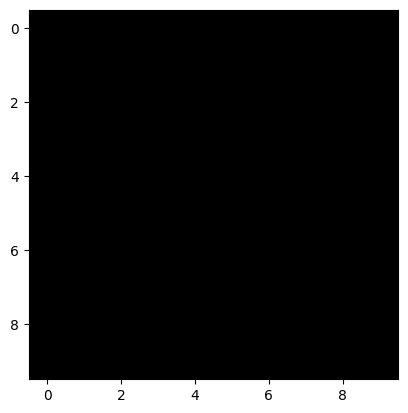

In [19]:
img = np.dstack((b1, b2, b3))
f = plt.figure()
plt.imshow(img)
plt.savefig('Tiff.png')
plt.show()

In [44]:
img.shape

(10, 10, 3)